In [2]:
#pip install git+https://github.com/cabeen/qit

In [3]:
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
os.getcwd()

'/Users/nanatang/Documents/GradResearch'

In [27]:
x_reg = np.linspace(-1,1,1000)
x_wide = np.linspace(-.5,.5,500)
#x_narrow = np.linspace(-200,200,1000)
y_reg = np.sinc(x_reg)
y_wide = np.sinc(x_wide)
#y_narrow = np.sinc(x_narrow)

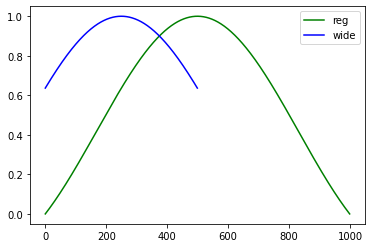

In [28]:
plt.plot(y_reg,c='green',label='reg')
plt.plot(y_wide,c='blue',label='wide')
#plt.plot(y_narrow,c='red',label='narrow')
plt.legend()
#plt.xlim([-2,2])

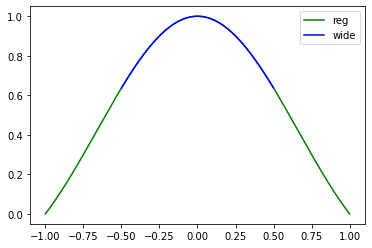

In [8]:
plt.plot(x_reg,y_reg,c='green',label='reg')
plt.plot(x_wide,y_wide,c='blue',label='wide')
#plt.plot(y_narrow,c='red',label='narrow')
plt.legend()
#plt.xlim([-2,2])

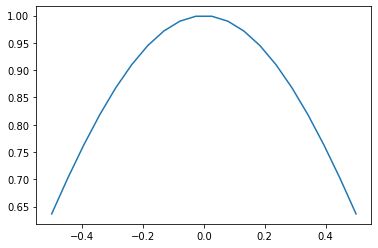

In [15]:

#z = 2*np.sinc(x/2)

In [58]:
# make an frangi analysis folder
os.makedirs('frangi-valdo',exist_ok=True) # this will be in GradResearch

In [4]:
### get subjects

# T1: sub-101_space-T1_desc-masked_T1.nii.gz
# ground truth: sub-101_space-T1_desc-Rater1_PVSSeg.nii.gz



# get subject paths
path_subj = '/Users/nanatang/Documents/GradResearch/SYT-MRIimages/Task1-selectfullseg'
files = os.listdir(path_subj)
subjects = [i for i in files if i.startswith('sub')]

t1_list = []
gt_list = []


# create a new folder in analysis folder for each subject, and gather all T1s into a list and all ground truths into a list
# now working only in new folder with all the copied data
for subject in subjects:
    subjdir = os.path.join(os.getcwd(),'frangi-valdo',subject+'-frangi')
    os.makedirs(subjdir,exist_ok=True)
    t1 = os.path.join(path_subj,subject,subject+'_space-T1_desc-masked_T1.nii.gz')
    shutil.copy(t1,subjdir)
    t1_list.append(os.path.join(subjdir,subject+'_space-T1_desc-masked_T1.nii.gz'))
    gt = os.path.join(path_subj,subject,subject+'_space-T1_desc-Rater1_PVSSeg.nii.gz')
    shutil.copy(gt,subjdir)
    gt_list.append(os.path.join(subjdir,subject+'_space-T1_desc-Rater1_PVSSeg.nii.gz'))
    

#t1_list = os.path.join(path_subj,subject,subject+'_space-T1_desc-Rater1_PVSSeg.nii.gz')
# gt_list = os.path.join(path_subj,subject,subject+'_space-T1_desc-Rater1_PVSSeg.nii.gz')

In [5]:
subjects

['sub-101', 'sub-106', 'sub-105', 'sub-102', 'sub-103', 'sub-104']

In [6]:
t1_list

['/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/sub-101_space-T1_desc-masked_T1.nii.gz',
 '/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-106-frangi/sub-106_space-T1_desc-masked_T1.nii.gz',
 '/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-105-frangi/sub-105_space-T1_desc-masked_T1.nii.gz',
 '/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-102-frangi/sub-102_space-T1_desc-masked_T1.nii.gz',
 '/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-103-frangi/sub-103_space-T1_desc-masked_T1.nii.gz',
 '/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-104-frangi/sub-104_space-T1_desc-masked_T1.nii.gz']

In [24]:
#t1_list[0].split('/'+'sub-101_space',1)[0]

subj_name = t1_list[0].split('/')[7][:7]
subj_folder = t1_list[0].split('/'+subj_name+'_space',1)[0]

hes =  os.path.join(subj_folder, subj_name+'-hessian.nii.gz')

hes

'/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/sub-101-hessian.nii.gz'

In [88]:
t1_list[0]

'/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/sub-101_space-T1_desc-masked_T1.nii.gz'

In [62]:
preproc = os.path.join(subj_folder,subj_name+'-denoised.nii.gz')

os.system(f'/Users/nanatang/anaconda3/envs/pvssegment/build/ANTS-build/Examples/DenoiseImage \
          -i {t1_list[0]} \
          -n Rician \
          -o {preproc}')

0

In [68]:
preproc
subj_folder = preproc.split('/'+subj_name+'-denoised',1)[0]
subj_folder

'/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi'

In [81]:
preproc[:-7]

'/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/sub-101-denoised'

In [87]:
fsl_segment = '/Users/nanatang/Documents/GradResearch/fsl/bin/run_first_all'

biasdenoise =  os.path.join(subj_folder,subj_name+'-bnpreproc.nii.gz')
deepgrey_folder = os.path.join(subj_folder,'deepgrey')  # this is: /Users/nanatang/.../frangi-valdo/subj/deepgrey
deepgrey_out = os.path.join(deepgrey_folder,subj_name+'-deepgrey') # this is: /Users/nanatang/.../frangi-valdo/subj/deepgrey/deepgrey.nii.gz


os.system(f'({fsl_segment} \
                -i {biasdenoise} \
                -o {deepgrey_out}')

sh: -c: line 1: syntax error: unexpected end of file


512

In [89]:
fsl_brain = '/Users/nanatang/Documents/GradResearch/fsl/bin/bet'
brain_extract = os.path.join(subj_folder,subj_name+'-betbrain-jntest.nii.gz')
os.system(f'{fsl_brain} \
            {t1_list[0]} \
            {brain_extract} \
            -f {0.2} \
            -g {0} \
            -m' ) 

/Users/nanatang/Documents/GradResearch/fsl/bin/bet: line 157: /bin/remove_ext: No such file or directory


256

/Users/nanatang/Documents/GradResearch/fsl/bin/bet failed during command:/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/sub-101_space-T1_desc-masked_T1.nii.gz /Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/sub-101-betbrain-jntest.nii.gz -f 0.2 -g 0 -m


In [99]:
subject = 'sub-LASS001'
path_subj = '/Users/nanatang/Documents/GradResearch/Omer-subj'
subjdir = os.path.join(os.getcwd(),'frangi-omer','LASS001-frangi')
t1 = os.path.join(path_subj,subject,subject+'_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz')

t1_sub = os.path.join(subjdir,subject+'_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz')


subj_name = t1.split('/')[7][:11]
subj_folder = t1_sub.split('/'+subj_name+'_space',1)[0]
subj_folder


'/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/frangi-omer/LASS001-frangi'

In [77]:
#os.environ["PATH"] = "/Users/nanatang/Documents/GradResearch/qit-build-mac-latest/bin"

# hes = os.path.join(subj_folder, subj_name+'-hessian.nii.gz')

# os.system(f'/Users/nanatang/anaconda3/envs/pvssegment/bin/qit-build-mac-latest/bin/qit VolumeFilterHessian \
#           --input {t1_list[0]} \
#           --mode Norm \
#           --output {hes}')
#hes


In [32]:
hes_stats = os.path.join(subj_folder, subj_name+'-hessianstats.csv')
os.system(f'/Users/nanatang/anaconda3/envs/pvssegment/bin/qit-build-mac-latest/bin/qit VolumeMeasure \
              --input {hes} \
              --output {hes_stats}')

0

In [50]:
csv = pd.read_csv(hes_stats, index_col = 0)
csv

,value
stat,
mean,3.930603e+01
std,1.039178e+02
stde,3.025616e-02
min,0.000000e+00
qlow,0.000000e+00
median,0.000000e+00
qhigh,0.000000e+00
iqr,0.000000e+00
max,2.553659e+03


In [53]:
type(csv.loc['max'][0])

numpy.float64

In [33]:
%cd /Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi/
%ls

/Users/nanatang/Documents/GradResearch/frangi-valdo/sub-101-frangi
sub-101-hessian.nii.gz
sub-101-hessianstats.csv
sub-101_space-T1_desc-Rater1_PVSSeg.nii.gz
sub-101_space-T1_desc-masked_T1.nii.gz


In [21]:
import pandas as pd
import numpy as np
data=[1,2,3,4,5,6,7]
df = pd.DataFrame(data=data,index = ['a','b','c','d','e','f','g'],columns = ['score']).rename_axis('subjects')
df.loc['h'] = 7
df
#df.append({'subjects':'avg','score':np.mean(data)}, ignore_index=True)
#df.loc[len(df)] = ['h',8]

,score
subjects,
a,1
b,2
c,3
d,4
e,5
f,6
g,7
h,7


In [3]:
folder = '05mm'
fold=os.path.join('Users','nanatang','Documents','GradResearch','fsl','05mm')
fold+'cort.nii'

'Users/nanatang/Documents/GradResearch/fsl/05mmcort.nii'

In [17]:
# preprocessing

# oasis_directory = Documents/GradResearch/build/ANTS-build
# export ANTSPATH=/opt/ANTs/bin/
# export PATH=${ANTSPATH}:$PATH

#for t1sub in t1_list:
    # antsCorticalThickness.sh -d 3 \
    # -a t1sub \
    # -e os.path.join(oasis_dir, 'OASIS/T_template0.nii.gz') \
    # -t os.path.join(oasis_dir,'OASIS/T_template0_BrainCerebellum.nii.gz') \
    # -m os.path.join(oasis_dir,'OASIS/T_template0_BrainCerebellumProbabilityMask.nii.gz') \
    # -f os.path.join(oasis_dir,'OASIS/T_template0_BrainCerebellumExtractionMask.nii.gz') \
    # -p os.path.join(oasis_dir,'OASIS/Priors2/priors%d.nii.gz') \
    # -o subjdir = os.path.join(os.getcwd(),'frangi-valdo',subject+'-frangi')/



In [18]:
# wmh ?

In [12]:
#%env PATH=$PATH:/Users/nanatang/Documents/GradResearch/qit-build-mac-latest/bin
# os.environ["PATH"] = "/Users/nanatang/Documents/GradResearch/qit-build-mac-latest/bin"

#  #VolumeFilterHessian --input [t1sub[0]] --mode Norm --output 'hessian.nii.gz'


# import subprocess
# output = subprocess.Popen(["qit", "VolumeFilterHessian", "--input", "t1sub[0]", "--mode", "Norm", "--output", "hessian.nii.gz"],stdout=subprocess.PIPE)
# output.stdout

In [3]:
# qit
#%env PATH="/Users/nanatang/Documents/GradResearch/qit-build-mac-latest/bin"
os.environ['pvs-PATH'] = '/Users/nanatang/Documents/GradResearch/qit-build-mac-latest/bin'

 
#for t1sub in t1_list:
    

In [4]:
# outputs

In [5]:
os.system('env')

TERM_PROGRAM=Apple_Terminal
SHELL=/bin/zsh
TERM=xterm-color
CLICOLOR=1
TMPDIR=/var/folders/1b/13y0jzbx0r7d3rjhqvq1dwd80000gn/T/
CONDA_SHLVL=1
CONDA_PROMPT_MODIFIER=(base) 
TERM_PROGRAM_VERSION=445
PYDEVD_USE_FRAME_EVAL=NO
TERM_SESSION_ID=B688C076-5391-4D28-92DF-4609B28DD06B
USER=nanatang
pvs-PATH=/Users/nanatang/Documents/GradResearch/qit-build-mac-latest/bin
CONDA_EXE=/Users/nanatang/anaconda3/bin/conda
SSH_AUTH_SOCK=/private/tmp/com.apple.launchd.M5KbJpR816/Listeners
__CF_USER_TEXT_ENCODING=0x1F5:0x0:0x0
KERNEL_LAUNCH_TIMEOUT=40
JPY_PARENT_PID=53595
PAGER=cat
_CE_CONDA=
PATH=/Users/nanatang/anaconda3/bin:/Users/nanatang/anaconda3/condabin:/Library/Frameworks/Python.framework/Versions/3.9/bin:/Library/Frameworks/Python.framework/Versions/3.8/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin
_=/usr/bin/env
CONDA_PREFIX=/Users/nanatang/anaconda3
__CFBundleIdentifier=com.apple.Terminal
PWD=/Users/nanatang/Documents/GradResearch
MPLBACKEND=module://matplotl

0

ib_inline.backend_inline
LANG=en_US.UTF-8
XPC_FLAGS=0x0
_CE_M=
XPC_SERVICE_NAME=0
SHLVL=2
HOME=/Users/nanatang
CONDA_PYTHON_EXE=/Users/nanatang/anaconda3/bin/python
LOGNAME=nanatang
CONDA_DEFAULT_ENV=base
DISPLAY=/private/tmp/com.apple.launchd.w4R4lQhhis/org.xquartz:0
GIT_PAGER=cat
ATLAS_ETC_PATH=/Users/nanatang/Documents/GitHub/stsci_etc/Spectroscopic ETC/atlas_etc-master
